### Fått hjelp av Maja Vullum

# 🌟 Assignment 2. Operation "AI GeoGuessr"

### Deadline: Monday, October 21, 2024, 11:59:00 PM CET (GMT +2)

## 🎯 Mission Overview

The operation consists of two independent missions. Similar to the previous operation, students are required to solve the tasks by achieving the required score and answering the follow-up questions.

## 🧪 Neural Networks and Unsupervised Learning

1. **Mission 2.1 (Supervised Learning)**: 
   - Solve a supervised learning problem using a Neural Network (MLP). This is similar to a problem you have worked on before but requires the use of a neural network model.

2. **Mission 2.2 (Unsupervised Learning)**:
   - Given an unlabeled dataset, your task is to cluster similar data points and achieve 100% clustering accuracy. You will not have access to the true labels, but you can verify your cluster assignments using the Kaggle competition provided.

## 📝 Delivery Format (Blackboard)

Please submit **two files**:
1. The completed Jupyter notebook.
2. The solution for the second dataset as a CSV file with two `int` columns: `['ID', 'cluster']`.

## Kaggle details
- Invitation link: https://www.kaggle.com/t/6610d6c6ba314eac9ead0b7a47695700
- Kaggle is a popular platform for data science competitions.
- It allows us to create a Private competition where you can submit your solutions and verify whether you are thinking in the right direction.
- The results of the competition is visible only to the competition participants. 
- We will not grade the submissions on Kaggle, we set it up to let you check your clustering.
- You still have to deliver the `.csv` file of the solution and the complete `.ipynb` notebook with discussions and solution code.  



> Good luck, comrade!

---


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam, SGD

# 🧠 Mission 2.1: Decoding SkyNet's Neural Encryption **(using Neural Networks)**

### 🌐 The Discovery
The dataset consists of the same "Synapse Cipher" data from Assignment 1.

### 🎯 Your Mission
1. Implement a neural network (MLP) using one of the following frameworks: Keras, PyTorch, or TensorFlow.
2. Solve the non-linear problem without manual feature engineering. So the manual feature engineering is not allowed!
3. Predict SkyNet's binary decisions (0 or 1) based on paired signals.
4. Enhance performance by using techniques such as learning rate scheduling, selecting a good optimizer, and fine-tuning training hyperparameters.

> Note: There are no restrictions on the tricks you can use — just achieve the required accuracy. Stack more layers, use AdamW, scheduling, ect. Have fun :) 

### 📊 Formal Requirements
1. **Implementation**:
   - Develop a Neural Network using predefined functions/layers.
   - Use one of the popular frameworks: Keras, PyTorch, or TensorFlow.
   - Implement a manual learning rate scheduler with warmup and cosine decay.

2. **Performance**: Achieve at least **0.92** accuracy on the test set.

3. **Discussion**:
   - How did you achieve the reproducibility of the results?
   
      *To achieve reproducibility of the results, I implemented the use of a seed. When using seed you make sure that all the random processes are eexecuted in the same wway every time the code runs. Another possibility was to set ```shuffle=false``` in ```model.fit()```, but since this could impact the performance of the model I chose the seed method instead.*

   - Visualize the network's architecture and decision boundary.

      *Visualised further down in the notebook.*

   - Which optimizer did you choose? Discuss the differences between the SGD and Adam optimizers.

      *After trying both the SGD and the Adam optimizer, I went with Adam since that optimizer gave the best results. When using the Adam optimizer, the learning rate is adapted for each parameter. This is because it combines the benefits of both momentum and RMSProp. Since the learing rate behaves like this, we get a faster convergence and more efficient hancling of noisy gradients compared to SGD. On the other side, SGD updates the model parameters with a constant learning rate. This makes it slower to converge in more complex cases. I got a better result with Adam in this case because of its ability to dynamically adjust learning rates during training.*

   - Visualize the learning rate dynamics. Did the learning rate scheduling improve performance? Why or why not?
      
      *Visualised further down in the notebook. I didn't implement a learning rate scheduler, but as discussed previously, I used the Adam optimizer which includes an adaptive learning rate mechanism. This resulted in improved performance by ensuring faster convergence and more stable training.*
      
   - Conduct an ablation study of each architectural and optimization choice concerning test accuracy.

      - *Batch size: I tried with many different batch sizes and saw that a batch size of 32 followed by 64 gave the best results with an accuracy of 0.93. If both first and second layer had batch size 32, I managed to fulfill the requirement of 0.92. Same when both layers had batch size 64.*

      - *Optimizer: As discussed above, the different optimizers, Adam and SGD gives different accuracies. I experienced that SGD had worse accuracy than Adam*

      - *Number of layers: I tried adding and removing layer, and noticed that the performance decreased. Achieved best performance with three layers.*
      


In [3]:
# For network architecture visualization, other options are totally fine
from tensorflow.keras.utils import plot_model, Sequence
from tensorflow.keras import callbacks
from torchviz import make_dot

In [4]:
data = pd.read_csv('nn_data.csv')
train = data[data['split'] == 'train']
test = data[data['split'] == 'test']

X_train = train[['x0', 'x1']]
X_test = test[['x0', 'x1']]
y_train = train['y']
y_test = test['y']

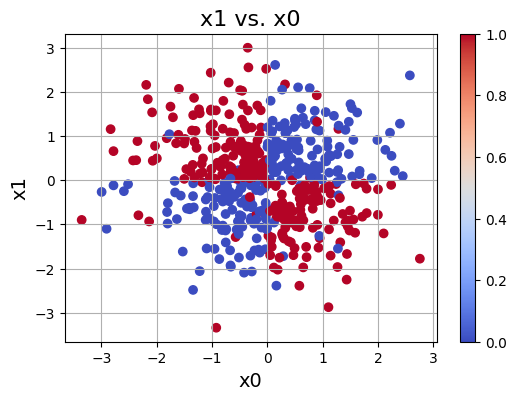

In [5]:
plt.figure(figsize=(6, 4))
plt.scatter(train['x0'], train['x1'], c=train['y'], cmap='coolwarm')
plt.grid(True)
plt.xlabel('x0', fontsize=14)
plt.ylabel('x1', fontsize=14)
plt.title('x1 vs. x0', fontsize=16)
plt.colorbar()
plt.show()


In [6]:
# Without manual implementation

model  = Sequential(
    [
        Dense(32, activation='relu', input_shape=(2,)),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ]
)

np.random.seed(100)
random.seed(100)
tf.random.set_seed(100)

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

accuracy = model.evaluate(X_test, y_test)[1]
print(f'Accuracy: {accuracy:.2f}')

model.save('modelmission1v1.keras')

Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4651 - loss: 0.6891 - val_accuracy: 0.7820 - val_loss: 0.6522
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7814 - loss: 0.6452 - val_accuracy: 0.8100 - val_loss: 0.6161
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8087 - loss: 0.6092 - val_accuracy: 0.8260 - val_loss: 0.5814
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8198 - loss: 0.5739 - val_accuracy: 0.8600 - val_loss: 0.5450
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8671 - loss: 0.5363 - val_accuracy: 0.8760 - val_loss: 0.5074
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8920 - loss: 0.4979 - val_accuracy: 0.8980 - val_loss: 0.4725
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8940 - loss: 0.4622 - val_accuracy: 0.8980 - val_loss: 0.4420
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9057 - loss: 0.4314 - val_accuracy: 0.9000 - val_loss: 0.4172
Epo

In [7]:
# With manual implementation

np.random.seed(27)
random.seed(27)
tf.random.set_seed(27)

model  = Sequential(
    [
        Dense(10, activation='relu', input_shape=(2,)),
        Dense(12, activation='relu'),
        Dense(1, activation='sigmoid')
    ]
)

initialLearningRate= 0.02
warmupEpochs = 5
totalEpochs = 90

LRs = []

def cosineDelayWithWarmup(epoch):
    if epoch < warmupEpochs:
        lr = initialLearningRate * (epoch + 1) / warmupEpochs
    else:
        cosine_decay = 0.5 * (1 + np.cos(np.pi * (epoch - warmupEpochs) / (totalEpochs - warmupEpochs)))
        lr = initialLearningRate * cosine_decay
    LRs.append(lr)
    return lr

LRsched = callbacks.LearningRateScheduler(cosineDelayWithWarmup)
early_stopping = callbacks.EarlyStopping(monitor='accuracy', patience=10, restore_best_weights=True)

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=32, callbacks = [LRsched, early_stopping])

accuracy = history.history['accuracy']
loss = history.history['loss']

print(history.history)

test_loss, test_ac = model.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy: {test_ac:.2f}")

model.save('modelmission1v2.keras')

Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - accuracy: 0.6787 - loss: 0.6500 - learning_rate: 0.0040
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - accuracy: 0.8378 - loss: 0.5796 - learning_rate: 0.0080
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - accuracy: 0.8803 - loss: 0.4543 - learning_rate: 0.0120
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - accuracy: 0.9270 - loss: 0.3388 - learning_rate: 0.0160
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - accuracy: 0.9192 - loss: 0.3140 - learning_rate: 0.0200
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9141 - loss: 0.3091 - learning_rate: 0.0200
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - accuracy: 0.9201 - loss: 0.2966 - learning_rate: 0.0200
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - accuracy: 0.9248 - loss: 0.2906 - learning_rate: 0.0200
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - accuracy: 0.9328 - loss: 0.2856 - learning_rate: 0.0199
Epoch 10/50
16/16 ━━━━━

In [8]:
# Vizualitation of the network architecture
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 12)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 527 (2.06 KB)

 Trainable params: 175 (700.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 352 (1.38 KB)

24063/24063 ━━━━━━━━━━━━━━━━━━━━ 6s 227us/step


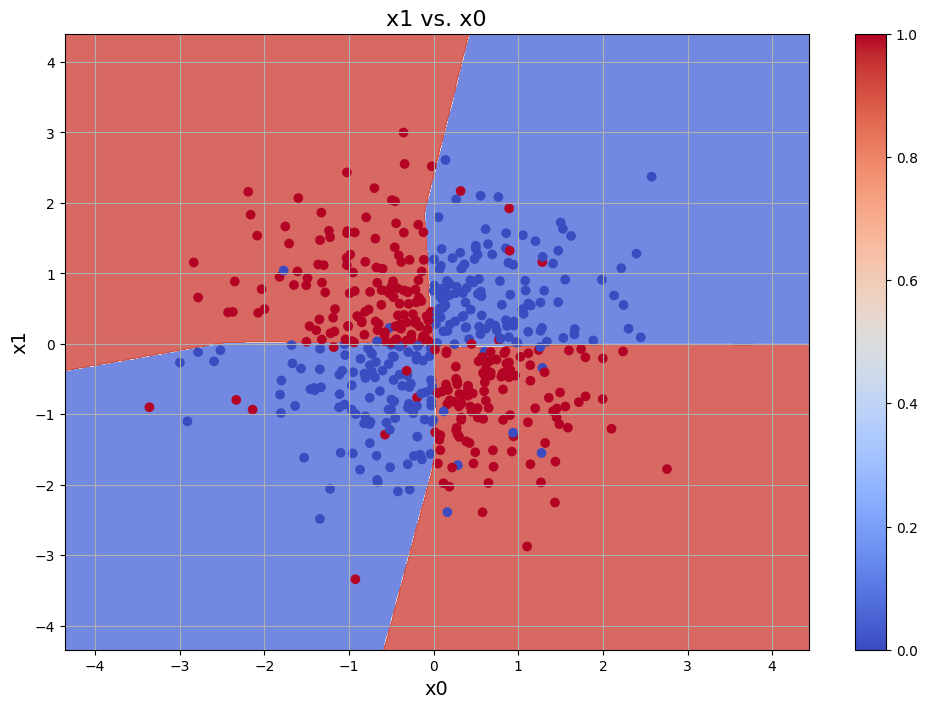

In [9]:
# Vizualitation of decision boundary

# Grid boundaries
x_min, x_max = data['x0'].min() - 1, data['x0'].max() + 1
y_min, y_max = data['x1'].min() - 1, data['x1'].max() + 1

# Meshgrid
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Prediction
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
pred = (Z > 0.5).astype(int).reshape(xx.shape)

# Plot
plt.figure(figsize=(12, 8))
plt.contourf(xx, yy, pred, alpha=0.8, cmap='coolwarm')
plt.scatter(train['x0'], train['x1'], c=train['y'], cmap='coolwarm')
plt.grid(True)
plt.xlabel('x0', fontsize=14)
plt.ylabel('x1', fontsize=14)
plt.title('x1 vs. x0', fontsize=16)
plt.colorbar()
plt.show()

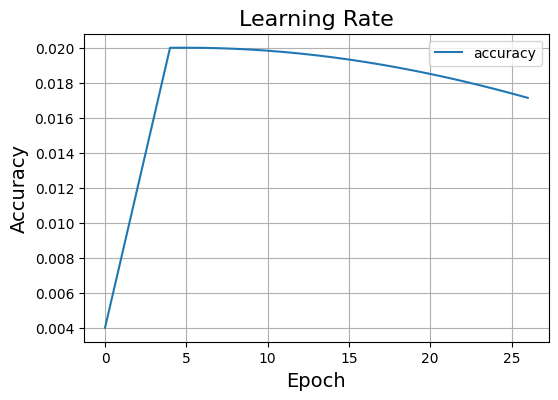

In [10]:
# Visualization of learning rate

plt.figure(figsize=(6, 4))
plt.plot(LRs, label='accuracy')
plt.grid(True)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Learning Rate', fontsize=16)
plt.legend()
plt.show()



# 📶📡🛰️🤳 Mission 2.2: Locate the AI Servers

### 🌐 The Discovery
The NTNU Intelligence team has intercepted encrypted documentation that potentially reveals the locations of AI-compromised servers within Trondheim. Our analysts believe the data contains information about these servers' locations. 

However, the number of servers and their exact positions remain unknown. To execute a strategic response, we need to understand the intercepted data and pinpoint the main AI servers.

We have also discovered a vulnerability in the AI's security: it has deployed a clustering verification feature on Kaggle. We can exploit this backdoor to validate our clustering hypotheses.

### 🎯 Your Mission
Identify the number of hidden servers (clusters) in the dataset. Assign cluster labels to each row in the original dataset and validate your clustering solution on Kaggle.  When achieved the perfect clustering accuracy, find the precise locations of these servers (clusters).

### 🧠 The Challenge
1. **Large Dataset**: The intercepted data file contains numerous features, making direct manipulation and clustering difficult. Applying dimensionality reduction techniques could help reveal patterns.
2. **Unsupervised Learning**: No target labels are provided, so you must identify patterns based solely on the dataset's features.
3. **Data Obfuscation**: The AI has obfuscated the data, making it difficult to discern its true structure. You must effectively manipulate the data to visually identify server locations.


### 🚀 Your Tools
- The intercepted AI dataset.
- Skills in feature engineering, data manipulation, and visualization.
- Clustering algorithms (e.g., KMeans, DBSCAN, Birch, Agglomerative Clustering, etc.) — [Clustering in Scikit-Learn](https://scikit-learn.org/stable/modules/clustering.html)
- Dimensionality reduction techniques (e.g., PCA, t-SNE, Isomap, UMAP, etc.)
- Kaggle competition platform with a daily submission limit of 50 attempts (~30 days * 50 submissions = 1500 total attempts per student).

> Note: Kaggle competition link — [Kaggle Competition](https://www.kaggle.com/t/6610d6c6ba314eac9ead0b7a47695700)

### 📊 Formal Requirements
1. **Achieve 100% Clustering Accuracy** on Kaggle.
> Note: The only way to check whether your clustering is correct is to submit it to Kaggle. We do not give you the clusters directly.

2. **Discussion Questions**:
   - **Dimensionality Reduction**: Which dimensionality reduction methods helped you determine the correct number of clusters? Why did some methods work better than others? Explain the differences between PCA, t-SNE, and UMAP.

      *I used UMAP to reduce the dataset's dimensions because it maintains local structure well and helped me visually separate clusters. While PCA is effective for linear patterns and can quickly reduce high-dimensional data, it didn't perform as well in this non-linear case. t-SNE was another option, but I didn't try it out. In theory it often takes longer and don't preserve global structure as well as UMAP.*

   - **Clustering Approach**: Which clustering algorithm and hyperparameters did you use? Discuss the differences between algorithms like KMeans and DBSCAN.

      *I used DBSCAN for clustering since it detects clusters of varying shapes and doesn't require predefining the number of clusters like KMeans. DBSCAN also handled noise better, which was useful given the obfuscated nature of the dataset. KMeans assumes clusters are spherical and equal-sized, which didn't fit the data as well.*

   - **Server Locations**: Identify the server locations. List the specific facilities in Trondheim and explain how you deduced their locations.

      *To identify the server locations, I . As you can see below, the diffent images 1, 2, 3, and 4, respectfully illutrates a map of Trondheim Spectrum, Ikea Leangen, Studentersamfundet and Pirbadet. First, I sorted the columns of my dataset by extracting the numeric part from each column name using `x.split('_')[1]`, and then I sorted them in ascending order. Once the columns were sorted, I created a new `sorted_data` DataFrame and converted it into a NumPy array. Next, I reshaped the data into 128x128 grids (since the data represents images), using the shape of the original data's rows. After reshaping, I chose a few specific images (from rows 0, 1, 4, and 12) to visualize. Finally, I set up a 2x2 grid of subplots with `plt.subplots(2, 2)` to display the images. I looped through the subplots using `axes.flat` and plotted each image with `ax.imshow()`. I also turned off the axes with `ax.axis('off')` to make the visuals cleaner and gave each image a title to identify it. After that, I called `plt.show()` to display the plots!*

   - **Data Type Analysis**: What is the hidden data type in the dataset? How does this information influence feature extraction for clustering? Can it explain why some dimensionality reduction algorithms are more effective?

      *The hidden data type appears to be images from Google Maps, which likely contributed to the complexity of feature extraction. This influenced why UMAP, which is great for complex, non-linear data, was more effective than PCA, which assumes linearity. Understanding this helped focus on dimensionality reduction techniques that retain both local and global data structures.*


In [11]:
data = pd.read_csv('unsupervised_data.csv', skiprows=1, header=None)
# Get the ID column
data.reset_index(drop=False, inplace=True)
data.rename(columns={'index': 'ID'}, inplace=True)

In [12]:
# The dataset is heavy. Applying clustering directly on the dataset is not feasible, I guess. 
data.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Columns: 16385 entries, ID to 16383
dtypes: float64(16384), int64(1)
memory usage: 500.0 MB


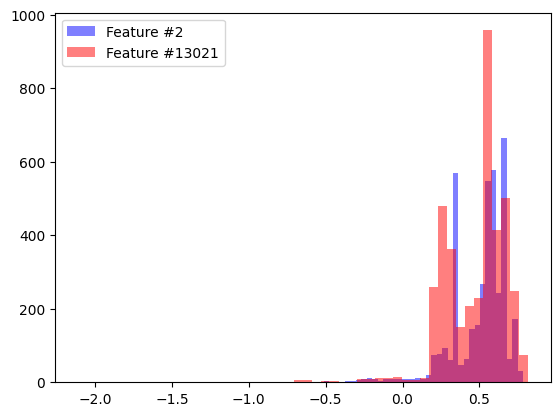

In [13]:
plt.hist(data.iloc[:, 2], bins=50, color='blue', alpha=0.5, label='Feature #2')
plt.hist(data.iloc[:, 13021], bins=50, color='red', alpha=0.5, label='Feature #13021')
plt.legend()
plt.show()

In [ ]:
import umap

reduced = umap.UMAP(n_components=3)
embedded = reduced.fit_transform(data.iloc[:, 1:])
dataframe = pd.DataFrame(embedded, columns=['x', 'y', 'z'])

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataframe['x'], dataframe['y'], dataframe['z'], c=data.iloc[:, 2], s = 1, cmap='coolwarm')
ax.set_title('UMAP: 3D Projection')
plt.show()


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


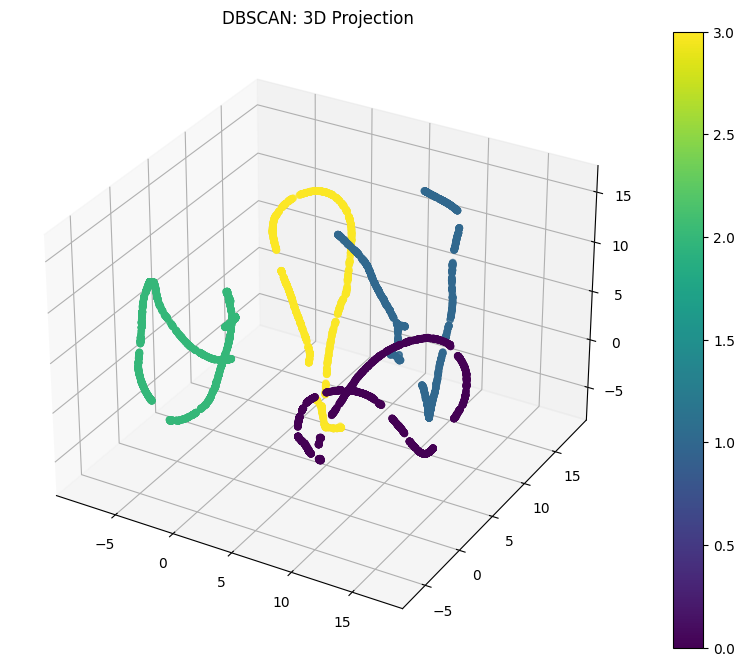

In [82]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaledData = scaler.fit_transform(embedded)
dbscan = DBSCAN(eps=0.75)
dataframe['Cluster'] = dbscan.fit_predict(scaledData)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataframe['x'], dataframe['y'], dataframe['z'], c=dataframe['Cluster'])
ax.set_title('DBSCAN: 3D Projection')
fig.colorbar(ax.scatter(dataframe['x'], dataframe['y'], dataframe['z'], c=dataframe['Cluster']))
plt.show()


In [83]:
submission_df = pd.DataFrame({
    'ID': data['ID'],              
    'cluster': dataframe['Cluster']
})
submission_df.to_csv('submission.csv', index=False)

In [84]:
# Cluster distribution

print(np.unique(dataframe['Cluster'], return_counts=True))

(array([0, 1, 2, 3]), array([1000, 1000, 1000, 1000]))


In [1]:
data = pd.read_csv('unsupervised_data.csv')

sorted_columns = sorted(data.columns, key=lambda x: int(str(x).split('_')[1]) if '_' in str(x) else 0)
sorted_data = data[sorted_columns]
data_array = sorted_data.to_numpy()
reshaped_data = np.reshape(data_array, (data_array.shape[0], 128, 128))
indices_to_plot = [0, 1, 4, 12]
images = [reshaped_data[i] for i in indices_to_plot]

fig, axes = plt.subplots(2, 2, figsize=(8, 8))


for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='RdBu')
    ax.axis('off') 
    ax.set_title(f"Image {i+1}")
plt.show()


NameError: name 'pd' is not defined


---

## 🎯 Note: Clustering Accuracy Evaluation


The clustering accuracy metric evaluates how well the predicted clusters match the true clusters, irrespective of the specific labels or names assigned to the clusters.

This means that the evaluation focuses solely on the correct grouping of data points rather than the numerical labels of the clusters themselves.

## Key Characteristics

- **Name-Independent**: The metric cares only about how well the data points are grouped together, not the specific numerical or categorical labels used for the clusters.
- **Focus on Grouping**: The evaluation rewards cluster assignments that correctly group the same data points together, regardless of the specific labels assigned.

### Example

If the true cluster assignments are:

```
[0, 0, 0, 1, 1, 1]
```

and your predicted cluster assignments are:

```
[1, 1, 1, 0, 0, 0]
```

the accuracy will still be **1.0** because the grouping of points is identical, even though the numerical labels are swapped.

## How the Metric is Computed

1. **Contingency Matrix**: 
   - Construct a contingency matrix that represents the overlap between the true clusters and the predicted clusters.

2. **Optimal Correspondence**: 
   - Use an optimization algorithm, such as the Hungarian method (linear sum assignment), to find the best possible correspondence between true and predicted labels, maximizing the number of correctly assigned data points.

3. **Accuracy Calculation**: 
   - Calculate the accuracy as the ratio of correctly matched data points to the total number of data points.

> This approach ensures that the evaluation is based on **cluster completeness** and **homogeneity**, rewarding cluster assignments that correctly group the same data points together, regardless of the specific labels used.

---

In [65]:
from typing import Any
import numpy as np
import sklearn.metrics
import scipy.optimize

def calculate_clustering_accuracy(true_labels: np.ndarray, cluster_labels: np.ndarray) -> float:
    """
    Calculate the clustering accuracy between true labels and cluster labels.

    The function constructs a contingency matrix between the true labels and cluster labels.
    It then uses the Hungarian algorithm (also known as linear sum assignment) to find the
    best matching between the cluster labels and true labels. The clustering accuracy is 
    calculated as the number of correctly matched labels divided by the total number of labels.

    Args:
        true_labels (np.ndarray): An array of true labels for each data point.
        cluster_labels (np.ndarray): An array of cluster labels predicted by a clustering algorithm.

    Returns:
        float: The clustering accuracy, a value between 0 and 1 representing the proportion of 
               correctly matched labels.
    
    Example:
        >>> true_labels = np.array([0, 1, 2, 0, 1, 2])
        >>> cluster_labels = np.array([1, 2, 0, 1, 2, 0])
        >>> calculate_clustering_accuracy(true_labels, cluster_labels)
        1.0

    Raises:
        ValueError: If true_labels and cluster_labels are not of the same length.
    """
    # Check if the input labels are of the same length
    if true_labels.size != cluster_labels.size:
        raise ValueError("true_labels and cluster_labels must have the same length.")

    # Construct a contingency matrix where each cell [i, j] indicates the number of points with 
    # true label i and cluster label j.
    contingency_matrix = sklearn.metrics.cluster.contingency_matrix(true_labels, cluster_labels)
    
    # Find the best matching between true labels and cluster labels using the Hungarian algorithm.
    # We negate the contingency matrix because linear_sum_assignment finds the minimum cost assignment.
    row_ind, col_ind = scipy.optimize.linear_sum_assignment(-contingency_matrix)
    
    # Calculate the number of correctly assigned labels according to the optimal matching.
    correct_pairs = contingency_matrix[row_ind, col_ind].sum()
    
    # Compute the clustering accuracy as the ratio of correctly matched labels to total labels.
    accuracy = correct_pairs / true_labels.size

    return accuracy


In [66]:
true_labels = np.array([0, 1, 2, 0, 1, 2])
cluster_labels = np.array([1, 2, 0, 1, 2, 0])
calculate_clustering_accuracy(true_labels, cluster_labels)

1.0

In [67]:
true_labels = np.array([0, 0, 0, 0, 0, 0])
cluster_labels = np.array([1, 2, 0, 1, 2, 0])
calculate_clustering_accuracy(true_labels, cluster_labels)

0.3333333333333333

In [68]:
true_labels = np.array([1, 1, 1, 2, 2, 2])
cluster_labels = np.array([0, 0, 0, 0, 0, 0])
calculate_clustering_accuracy(true_labels, cluster_labels)

0.5